# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [9]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dog_Images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


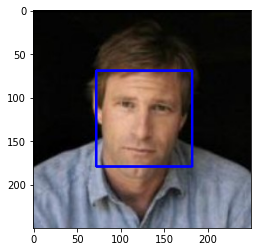

In [10]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [11]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
- 97% of human faces in humans were detected
- 17% of human faces in dogs were detected

In [12]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

###############
# Human Faces #
###############
total_right_pred = 0
for img_path in human_files_short:
    # check if one face is detected (haarcascades sometimes detect more than one face despite having only one face)
    if(face_detector(img_path)):
        total_right_pred += 1
print('Accuracy of haarcascades algorithm in human faces is: ', total_right_pred/len(human_files_short) * 100, '%')

#############
# Dog Faces #
#############
total_right_pred = 0
for img_path in dog_files_short:
    if(face_detector(img_path)):
        total_right_pred += 1
print('Accuracy of haarcascades algorithm in dogs is: ', total_right_pred/len(dog_files_short) * 100, '%')

Accuracy of haarcascades algorithm in human faces is:  97.0 %
Accuracy of haarcascades algorithm in dogs is:  17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
# Trying a different face_detection algorithm
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils

# return true if face is detected
def face_detector_dlib(img_path):
    gray = cv2.imread(img_path, 0)

    face_detect = dlib.get_frontal_face_detector()
    faces = face_detect(gray, 1)
    return len(faces) >= 1

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

###############
# Human Faces #
###############
total_right_pred = 0
for img_path in human_files_short:
    # check if one face is detected (haarcascades sometimes detect more than one face despite having only one face)
    if(face_detector_dlib(img_path)):
        total_right_pred += 1
print('Accuracy of dlib library algorithm in human faces is: ', total_right_pred/len(human_files_short) * 100, '%')

#############
# Dog Faces #
#############
total_right_pred = 0
for img_path in dog_files_short:
    if(face_detector_dlib(img_path)):
        total_right_pred += 1
print('Accuracy of dlib library algorithm in dogs is: ', total_right_pred/len(dog_files_short) * 100, '%')

Accuracy of dlib library algorithm in human faces is:  100.0 %
Accuracy of dlib library algorithm in dogs is:  14.000000000000002 %


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''

    # Load the image
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    loader = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])
    image = Image.open(img_path)
    image = loader(image)
    image = image.unsqueeze(0)  #this is for VGG
    image = (image.cuda() if use_cuda else image)
    
    # turns of grad tracking
    for param in VGG16.parameters():
        param.require_grad = False

    results = VGG16(image)
    _, predection = torch.max(results, 1)

    return predection.cpu().numpy()[0] # predicted class index

# Test our code
VGG16_predict(human_files[0])

523

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):    
    return VGG16_predict(img_path) in range(151, 268) # true if it's a dog

dog_detector(dog_files[7])

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__
- 00.0% of humans were detected as dogs
- 94.0% of dogs were detected as dogs


In [9]:
right_pred = 0
for image in human_files_short:
    if(dog_detector(image)):
        right_pred += 1
print('Accuracy of VGG16 in humans is: ', right_pred/len(human_files_short) * 100, '%')

right_pred = 0
for image in dog_files_short:
    if(dog_detector(image)):
        right_pred += 1
print('Accuracy of VGG16 in dogs is: ', right_pred/len(dog_files_short) * 100, '%')

Accuracy of VGG16 in humans is:0.0%
Accuracy of VGG16 in dogs is:94.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [29]:
### (Optional) 
resnet50 = models.resnet50(pretrained=True)
if use_cuda:
    resnet50.cuda()
def resnet50_predict(img_path):
    '''
    Args:
    img_path: path to an image

    returns:
    index of the predicted class
    '''
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    loader = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])
    image = Image.open(img_path)
    image = loader(image)
    image = image.unsqueeze(0)
    image = (image.cuda() if use_cuda else image)
    
    with torch.no_grad():
        results = VGG16(image)
        _, predection = torch.max(results, 1)

    return predection.cpu().numpy()[0]
    
def dog_detector_resnet50(img_path):    
    return resnet50_predict(img_path) in range(151, 268) # true if it's a dog

In [30]:

rtest the accuracy of RESNET50 modeld = 0
for image in human_files_short:
    if(dog_detector_resnet50(image)):
        right_pred += 1
print('Accuracy of resnet50 in humans is: ', right_pred/len(human_files_short) * 100, '%')

right_pred = 0
for image in dog_files_short:
    if(dog_detector_resnet50(image)):
        right_pred += 1
print('Accuracy of resnet50 in dogs is: ', right_pred/len(dog_files_short) * 100, '%')

Accuracy of resnet50 in humans is:0.0%
Accuracy of resnet50 in dogs is:95.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [8]:
import torch
import os
from torchvision import datasets
import torchvision.transforms as transforms

data_dir = 'data/dog_images/' # contains a directory for train / valid / test

batch_size = 30

# check if GPU is available
use_cuda = torch.cuda.is_available()

# the image will be resized into this
image_size = (224, 224)

# mean and std values are specified in https://pytorch.org/hub/pytorch_vision_resnet/
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([transforms.Resize(image_size),
                                       transforms.RandomRotation(10),
                                       transforms.RandomHorizontalFlip(0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])

test_transforms = transforms.Compose([transforms.Resize(image_size),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=mean, std=std)])


train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=test_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

print('train data: ', len(train_data))
print('test data: ', len(test_data))
print('valid data: ', len(valid_data))

loaders_scratch = { "train": trainloader,
                    "valid": validloader,
                    "test" : testloader}

train data:6680
test data:836
valid data:835


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- The code resizes the image into a 224x224x3 tensor because I wanted to use the same transforms in RESNET18 model, and RESNET18 uses a 224x224x3 tensor
- Yes I added a random rotation and a random flip in the transforms to improve the model and decrease overfitting.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [9]:
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        ## Define layers of a CNN
        # sees 224x224x3
        self.conv1 = nn.Conv2d(3,16,3, padding= 1)
        # sees 112x112x16
        self.conv2 = nn.Conv2d(16,32,3, padding= 1)
        # sees 56x56x32
        self.conv3 = nn.Conv2d(32,64,3, padding= 1)
        # sees 28x28x64
        self.conv4 = nn.Conv2d(64,128,3, padding= 1)
        # sees 14x14x128
        self.conv5 = nn.Conv2d(128,256,3, padding= 1)
        # sees 7x7x256
        self.conv6 = nn.Conv2d(256,512,3, padding= 1) # outputs 3x3x512
        # max pooling layer
        self.pool = nn.MaxPool2d(2,2)
        
        # fully connected layer
        self.fc1 = nn.Linear(3*3*512, 512)
        self.fc2 = nn.Linear(512, 133)
        
        self.dropout = nn.Dropout(0.25)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        
        x = x.view(-1, 3*3*512)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4608, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
- I applied MIT's equation: (W-F+2P)/(s+1) to obtain the image's dimension in each step
- I made six CNN layers starting at a depth of 16 all the way to 512
- The final output from the last CNN layer has 3x3x512 parameters
- The fully connected layer has one input layer of 3x3x512, a hidden layer with 512 features and finally the output layer with 133 classes, it also has a 25% chance of dropout

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [10]:
import torch.optim as optim

# loss function
criterion_scratch = nn.CrossEntropyLoss()

# optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [11]:
############################################################
# SKIP THIS CELL IF YOU DON'T WANT TO TRAIN ALL OVER AGAIN #
############################################################

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf

    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################/
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
    
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # apply the loss function
            loss = criterion(output, target)
            #print(loss)
            # backward prop
            loss.backward()
            # apply changes to the weights the optimizer
            optimizer.step()
            
            # track the loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ##############for batch_idx, (data, target) in enumerate(loaders['valid']):arget) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, tar
            # forward passget = data.cuda(), target.cuda()

            # calculate loss            output = model(data)
            loss = criterin(output, target)
            ## update the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        #train_loss = train_loss/len(loaders[0].sampler)
        #valid_loss = valid_loss/len(loaders[1].sampler)
        
        # print training/validation statistics 
        print('Epoch: {}\ing Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
    
        # save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model


# train the mod
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.889842 	Validation Loss: 4.888838
Validation loss decreased (inf --> 4.888838).  Saving model ...
Epoch: 2 	Training Loss: 4.887063 	Validation Loss: 4.886058
Validation loss decreased (4.888838 --> 4.886058).  Saving model ...
Epoch: 3 	Training Loss: 4.884035 	Validation Loss: 4.882545
Validation loss decreased (4.886058 --> 4.882545).  Saving model ...
Epoch: 4 	Training Loss: 4.876894 	Validation Loss: 4.872146
Validation loss decreased (4.882545 --> 4.872146).  Saving model ...
Epoch: 5 	Training Loss: 4.865582 	Validation Loss: 4.842953
Validation loss decreased (4.872146 --> 4.842953).  Saving model ...
Epoch: 6 	Training Loss: 4.851726 	Validation Loss: 4.810548
Validation loss decreased (4.842953 --> 4.810548).  Saving model ...
Epoch: 7 	Training Loss: 4.786116 	Validation Loss: 4.654875
Validation loss decreased (4.810548 --> 4.654875).  Saving model ...
Epoch: 8 	Training Loss: 4.699619 	Validation Loss: 4.517149
Validation loss decreased (4.65487

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [16]:
# load the last trained model
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 7.551670


Test Accuracy: 11% (96/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [17]:
## using the same data loaders
loaders_transfer = {"train": trainloader,
                    "valid": validloader,
                    "test" : testloader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
import torchvision.models as models

# RESNET18 model
model_transfer = models.resnet18(pretrained=True) #more about RESNET: https://pytorch.org/hub/pytorch_vision_resnet/

for param in model_transfer.parameters():
    param.require_grad = False
    
# the model's last layer
model_transfer.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 133),
                                 nn.LogSoftmax(dim=1))
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

* I printed out the model and found out that the last layer is called "fc" so i edited that layer and made the output= 133 and added a logSoftMax as the activation function because I'll use NLLLose for the cost function.

* RESNET is suitable for classification problems that's why I'm using it

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [19]:
import torch.optim as optim

# Loss function chosen based on log soft max layer in the model
criterion_transfer = nn.NLLLoss()

# specify optimizer
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [20]:
############################################################
# SKIP THIS CELL IF YOU DON'T WANT TO TRAIN ALL OVER AGAIN #
############################################################

# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.713728 	Validation Loss: 4.658055
Validation loss decreased (inf --> 4.658055).  Saving model ...
Epoch: 2 	Training Loss: 4.183192 	Validation Loss: 4.083927
Validation loss decreased (4.658055 --> 4.083927).  Saving model ...
Epoch: 3 	Training Loss: 3.460375 	Validation Loss: 3.310470
Validation loss decreased (4.083927 --> 3.310470).  Saving model ...
Epoch: 4 	Training Loss: 2.754590 	Validation Loss: 2.573335
Validation loss decreased (3.310470 --> 2.573335).  Saving model ...
Epoch: 5 	Training Loss: 2.221786 	Validation Loss: 2.031255
Validation loss decreased (2.573335 --> 2.031255).  Saving model ...
Epoch: 6 	Training Loss: 1.853024 	Validation Loss: 1.665010
Validation loss decreased (2.031255 --> 1.665010).  Saving model ...
Epoch: 7 	Training Loss: 1.607950 	Validation Loss: 1.430799
Validation loss decreased (1.665010 --> 1.430799).  Saving model ...
Epoch: 8 	Training Loss: 1.440418 	Validation Loss: 1.261204
Validation loss decreased (1.43079

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
# load the last trained model
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.774904


Test Accuracy: 77% (649/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [22]:
from glob import glob
import os
data_transfer =os.listdir(data_dir + 'train/')

In [24]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer]

def predict_breed_transfer(img_path):

    # Load the image
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    loader = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])
    image = Image.open(img_path)
    image = loader(image)
    image = image.unsqueeze(0)
    image = (image.cuda() if use_cuda else image)
    
    with torch.no_grad():
        results = model_transfer(image)
        _, predection = torch.max(results, 1)

    
    return class_names[predection.cpu().numpy()[0]] # predicted class

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [59]:
from PIL import Image

def run_app(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

    if dog_detector(img_path):
        # doggo is detected        
        print('WOOF WOOOF')
        print('you look like a {}'.format(predict_breed_transfer(img_path)))
    
    elif face_detector(img_path):
        # Huuman is detected
        print('Hello, huuman')
        print('you look like a {}'.format(predict_breed_transfer(img_path)))
        
    else:
        print('We can\'t detect aliens right now, stay tuned!')
        print('anyway, you look like a {}'.format(predict_breed_transfer(img_path)))
    
    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\n')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
- The output is just as I expected, the models already proved themselves in the previous cells
- train the dataset on only humans and dogs, only two labels included
- I personally don't like using common opencv algorithms in face detection and would use deep learning in any possible solution that doesn't require much CPU/GPU power

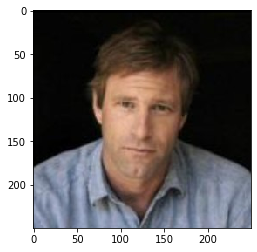

Hello, huuman
you look like a Chihuahua
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



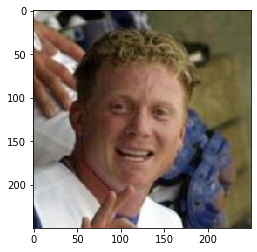

Hello, huuman
you look like a Pharaoh hound
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



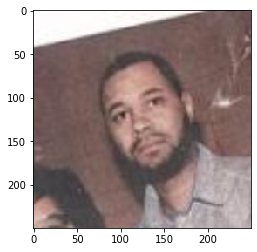

We can't detect aliens right now, stay tuned!
anyway, you look like a Pharaoh hound
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



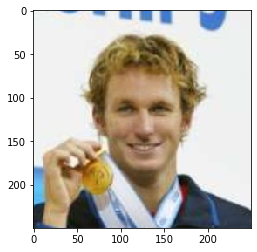

Hello, huuman
you look like a Dachshund
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



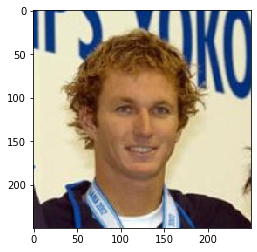

Hello, huuman
you look like a Chinese crested
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



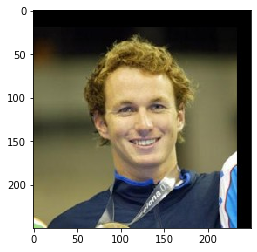

Hello, huuman
you look like a Chinese crested
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



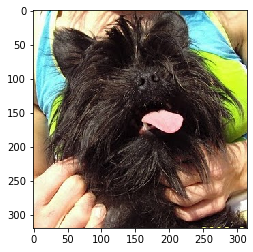

WOOF WOOOF
you look like a Affenpinscher
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



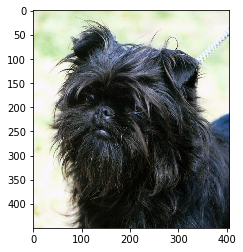

WOOF WOOOF
you look like a Affenpinscher
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



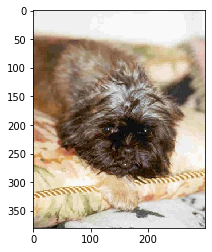

WOOF WOOOF
you look like a Brussels griffon
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



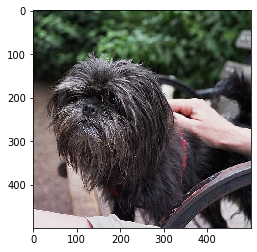

WOOF WOOOF
you look like a Affenpinscher
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



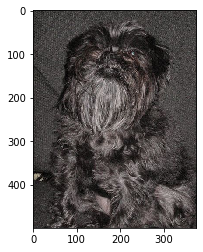

WOOF WOOOF
you look like a Affenpinscher
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



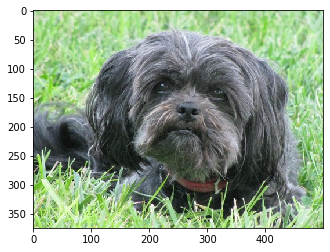

WOOF WOOOF
you look like a Lhasa apso
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



In [60]:
# run the app on 12 images
for file in np.hstack((human_files[:6], dog_files[:6])):
    run_app(file)
